# Titanic Dataset - Exploratory Data Analysis (EDA)

**Author:** Trijesh Kondapuram  

This notebook performs a detailed EDA (Exploratory Data Analysis) on the Titanic dataset.


In [1]:
# 🛠 STEP 1: Import Libraries and Load Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Load dataset
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# 🧾 STEP 2: Basic Info and Missing Values
df.info()
print("\nMissing Values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         

In [3]:
# 🧹 STEP 3: Data Cleaning
df.drop(columns=['Cabin'], inplace=True)  # Too many missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Confirm no missing values
df.isnull().sum()

C:\Users\Trijesh Kondapuram\AppData\Local\Temp\ipykernel_18240\4254786402.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Trijesh Kondapuram\AppData\Local\Temp\ipykernel_18240\4254786402.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [4]:
# 📊 STEP 4: Describe and Value Counts
print(df.describe())
print("\nSurvival Count:\n", df['Survived'].value_counts())
print("\nPclass Count:\n", df['Pclass'].value_counts())
print("\nSex Count:\n", df['Sex'].value_counts())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Survival Count:
 Survived
0    549
1    342
Name: count, dtype: int64

Pclass Co

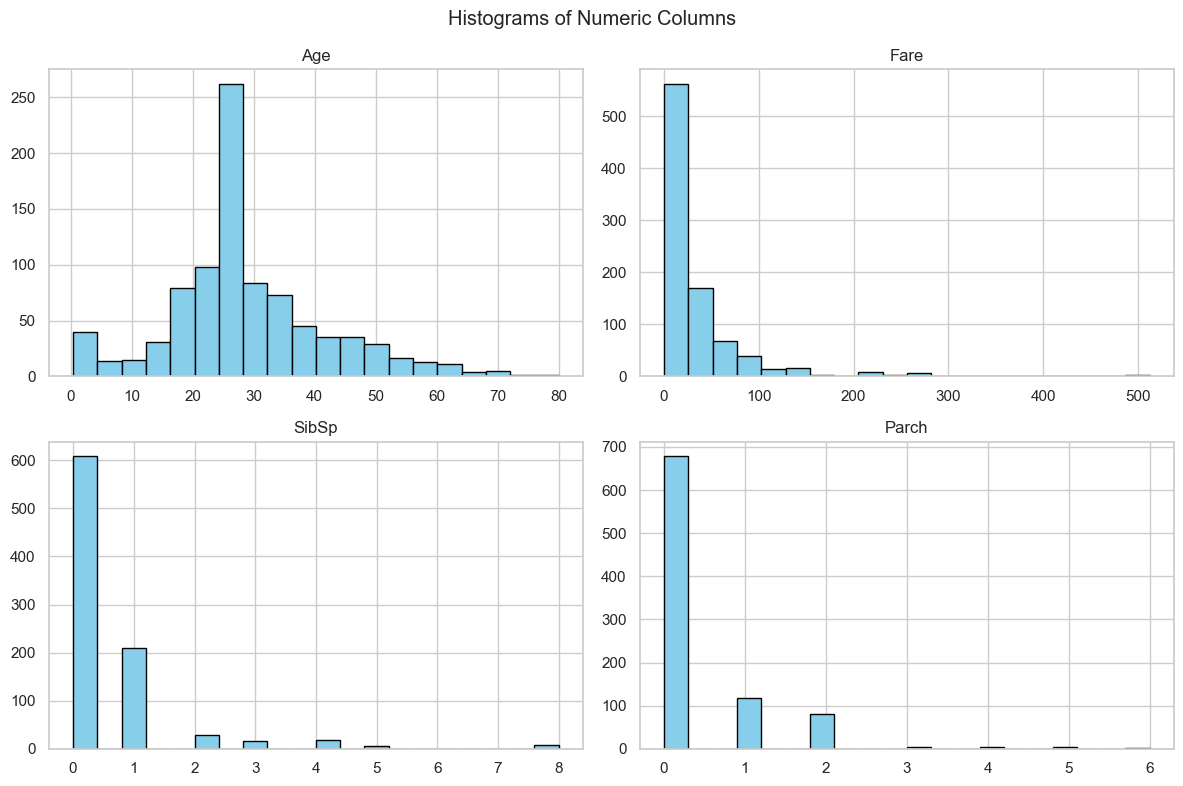

In [5]:
# 📈 STEP 5: Univariate Analysis - Histograms
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
df[numeric_cols].hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Columns")
plt.tight_layout()
plt.show()

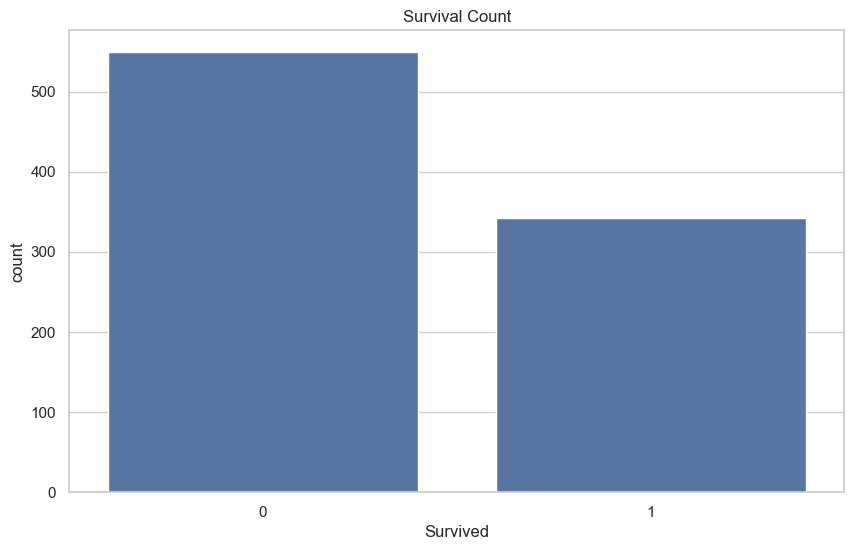

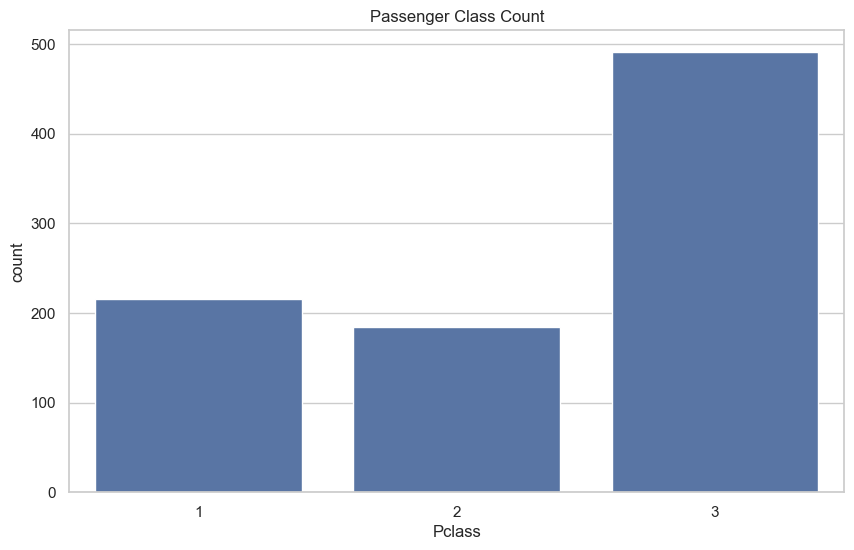

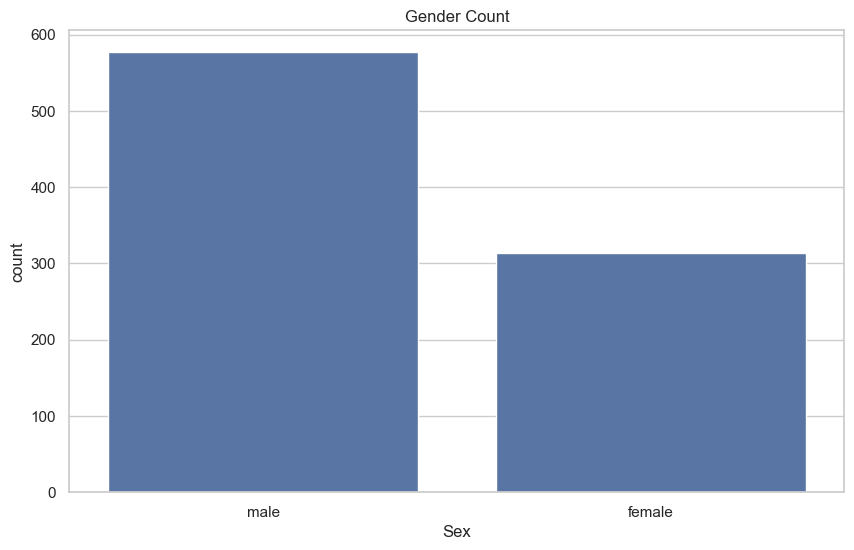

In [6]:
# 🎯 STEP 6: Categorical - Count Plots
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

sns.countplot(x='Pclass', data=df)
plt.title("Passenger Class Count")
plt.show()

sns.countplot(x='Sex', data=df)
plt.title("Gender Count")
plt.show()

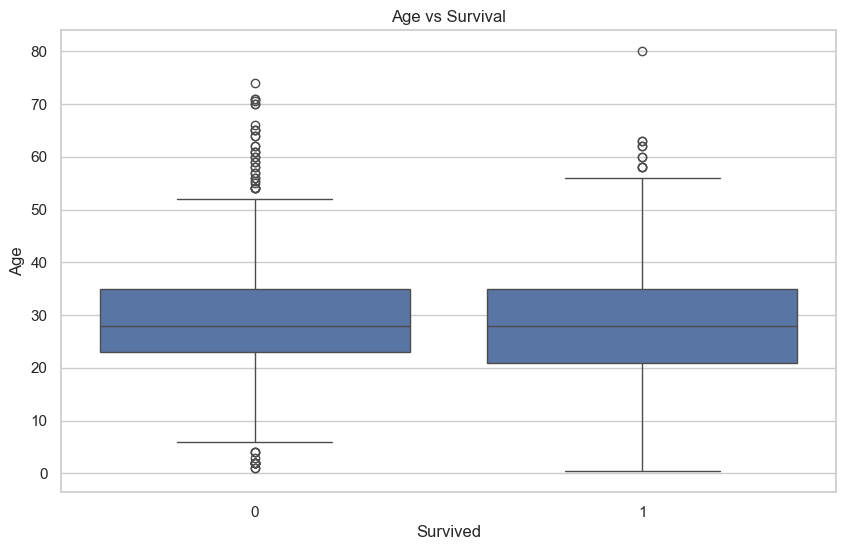

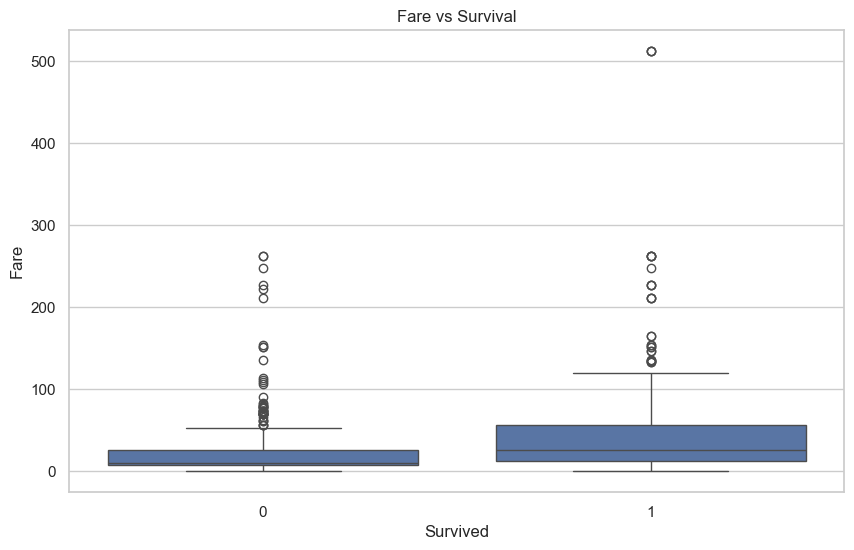

In [7]:
# 📊 STEP 7: Boxplots - Survival vs Age and Fare
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")
plt.show()

sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare vs Survival")
plt.show()

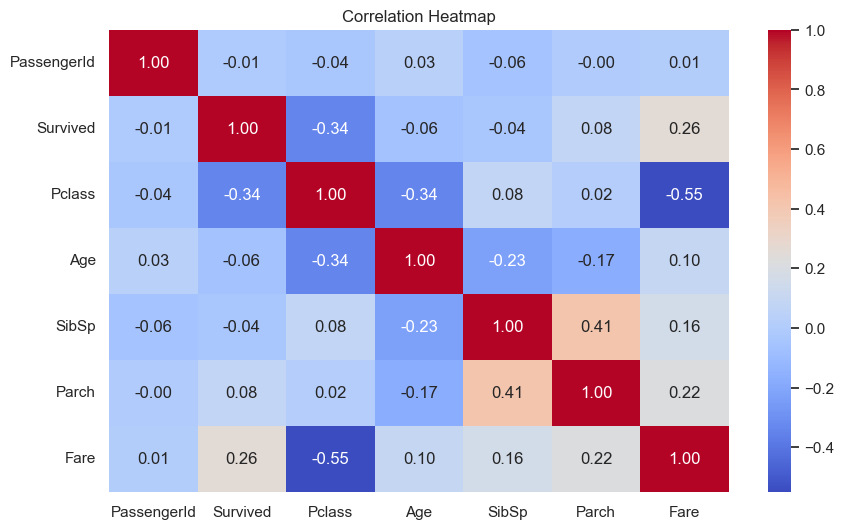

In [8]:
# 🔗 STEP 8: Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

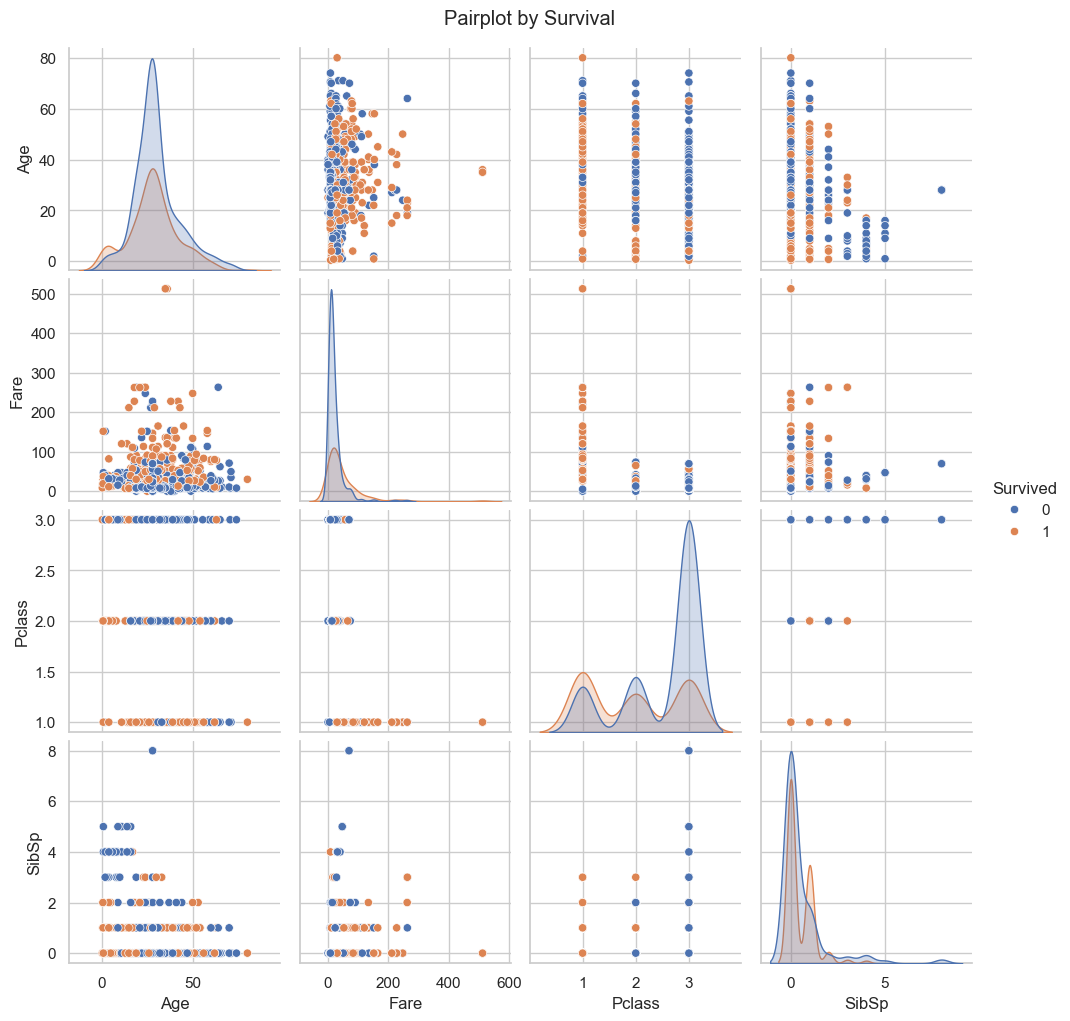

In [9]:
# 🔍 STEP 9: Pairplot
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass', 'SibSp']], hue='Survived')
plt.suptitle("Pairplot by Survival", y=1.02)
plt.show()

In [10]:
# 🧠 STEP 10: Summary of Insights
print("""
🔹 Most 1st Class and Female passengers survived.
🔹 Age and Fare distributions are skewed; many young and cheap ticket holders.
🔹 Strong correlation between Pclass and Survival.
🔹 Very weak correlation between Age and Survival directly.
🔹 Multivariate plots show clear patterns for survival based on class, sex, and fare.
""")


🔹 Most 1st Class and Female passengers survived.
🔹 Age and Fare distributions are skewed; many young and cheap ticket holders.
🔹 Strong correlation between Pclass and Survival.
🔹 Very weak correlation between Age and Survival directly.
🔹 Multivariate plots show clear patterns for survival based on class, sex, and fare.

